<img src="https://avatars.githubusercontent.com/u/61354833" align="left" width="70" height="70">

Code by [TomMakesThings](https://github.com/TomMakesThings/Cancer-Evolution)

# **About**
The clonal structure of a sequenced tumour sample can be estimated based upon common sets of SNVs across cells. This allows the calculation of cellular fractions and cancer cell fractions (CCF), which are useful statistics to quantify tumor heterogeneity and evolution. To see the GitHub repository, [click here](https://github.com/TomMakesThings/Cancer-Evolution).

# Imports

In [70]:
import numpy as np
import math
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors

# Cell Mutation Matrix
Below is an example cell mutation matrix, representing a population of sequenced cells in a cancer sample. The 42 columns represent loci, while the 23 rows represent cell's genotypes. At each loci, a 0 encodes a non-mutated loci, while 1 encodes a single nucleotide variant (SNV).

In [152]:
# Matrix of original cell mutation data
original_data = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
])

# Count the number of loci and cells
n_rows = original_data.shape[0]
n_cols = original_data.shape[1]

print(str(n_rows) + " loci")
print(str(n_cols) + " cells")

23 loci
42 cells


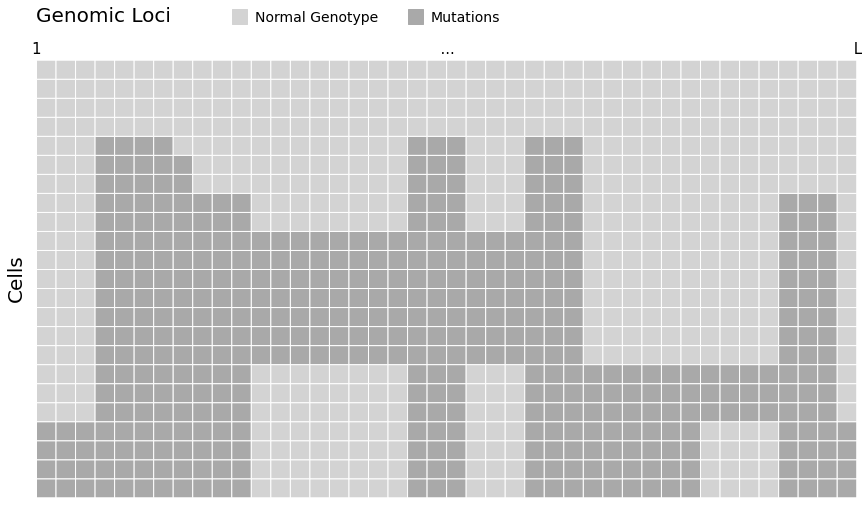

In [166]:
def plotMatrix(data, mut_colours = ['lightgrey', 'darkgrey'],
               expansion_coords = [], clone_coords = [],
               clone_features = [], clone_fracs = [],
               cell_fracs = [], ccfs = []):
    
    # Get the number of rows and columns in the matrix
    n_data_rows = data.shape[0]
    n_data_cols = data.shape[1]
    
    if len(expansion_coords) > 0:
        # Remove extra colours
        mut_colours = mut_colours[0:(len(expansion_coords) + 1)]
    
    # Create matrix plot and add data
    plt.figure(figsize = (0.35 * n_data_cols, 0.35 * n_data_rows))
    plt.pcolor(data[::-1], cmap = colors.ListedColormap(mut_colours),
               edgecolors = 'white', linewidths = 1)

    # Hide plot edge and axes
    plt.box(False)
    plt.axis('off')
    
    # Set title and axis labels
    plt.title("1" + " " * n_data_cols * 2 + "..." + " " * n_data_cols * 2 + "L", fontsize = 15)
    plt.text(0, n_data_rows + 2, "Genomic Loci", fontsize = 20)
    plt.text(-1.5, (n_data_rows/2) - 1, "Cells", fontsize = 20, rotation = 90)
    
    if len(cell_fracs) != 0:
        plt.text(-7.3, -3, "Cellular Fraction", fontsize = 16)
    if len(ccfs) != 0:
        plt.text(-8.5, -4, "Cancer Cell Fraction", fontsize = 16)

    # Add legend
    for c in range(len(mut_colours)):
        if c == 0:
            # Add square for normal genotype legend
            plt.gca().add_patch(patches.Rectangle((10, n_data_rows + 1.9), 0.8, 0.8,
                                                  fill = True, color = mut_colours[c],
                                                  clip_on = False, linewidth = 1))
        else:
            # Add squares for mutation legend
            plt.gca().add_patch(patches.Rectangle((19 + ((c - 1) * 1.1), n_data_rows + 1.9),
                                                  0.8, 0.8, fill = True, color = mut_colours[c],
                                                  clip_on = False, linewidth = 1))
    
    # Add text annotations at top
    plt.text(11.2, n_data_rows + 2, "Normal Genotype", fontsize = 14)
    plt.text(20.2 + ((c - 1) * 1.1), n_data_rows + 2, "Mutations", fontsize = 14)
    
    # Add lower lines and annotations for clonal expansions
    if len(expansion_coords) != 0:
        # Iteratate through each clonal expansion
        for i in range(len(expansion_coords)):
            # Get location of first loci in expansion
            x1 = expansion_coords[i]
            
            # Find loci of last loci in expansion
            if (i == len(expansion_coords) - 1):
                x2 = n_data_cols
            else:
                x2 = expansion_coords[i+1]
            
            # Add a line under the loci for the clonal expansion
            plt.gca().add_patch(patches.Rectangle((x1 + 0.1, -0.8), x2 - x1 - 0.3, 0.005, 
                                                  fill = True, color = "black", 
                                                  clip_on = False, linewidth = 2.5))
            # Add a letter annotation under the expansion
            plt.text(((x1 + x2) / 2) - 0.2, -2, chr(65 + i), fontsize = 16)
            
            # Plot cellular fractions if present
            if cell_fracs:
                # Round cell fraction and remove leading zero
                cell_frac = str(round(cell_fracs[i], 3))[1:]
                plt.text(((x1 + x2) / 2) - 0.2, -3, cell_frac, fontsize = 14)
                
            # Plot CCFs if present
            if ccfs:
                # Round CCF and remove leading zero
                ccf = str(round(ccfs[i], 3)).lstrip("0")
                plt.text(((x1 + x2) / 2) - 0.2, -4, ccf, fontsize = 14)
            
    # Add left and/or right lines and annotations for clonal populations
    if len(clone_coords) != 0:
        # Add left axis title
        plt.text(-4.5, (n_data_rows/2) - 1.5, "Clones", fontsize = 20, rotation = 90)
        
        # Add right axis title if clonal fractions given
        if (clone_fracs):
            plt.text(n_data_cols + 2.3, (n_data_rows/2), "π", fontsize = 20)
        
        # Underdermined names per clone
        clone_names = []
        
        # Check if info provided about which clones belong to which clonal expansions
        if (clone_features):
            # Create name for each clone based on sets of mutations from clonal expansions
            for c in clone_features:
                # Remove non-mutated loci
                c = c[c != 0]
                
                if (len(c) > 0):
                    # Set name by concatenating expansion names
                    clone_names.append(''.join([chr(64 + l) for l in c]))
                else:
                    # Otherwise call clone 0 for non-cancerous
                    clone_names.append("0")
        
        for j in range(len(clone_coords)):
            y1 = clone_coords[j]
            
            # Find final cell belonging to a clone
            if (j == len(clone_coords) - 1):
                y2 = n_data_rows
            else:
                y2 = clone_coords[j+1]
                
            # Add line for boundary of each clone
            plt.gca().add_patch(patches.Rectangle((-2, n_data_rows - y1), 0.005,
                                                  -(y2 - y1 - 0.2), fill = True,
                                                  color = "black", clip_on = False,
                                                  linewidth = 2.5))
            if (len(clone_names) > 0):
                # Add clone name to left axis
                name = clone_names[j]
                plt.text(-3, n_data_rows - ((y2 + y1)/2) - ((len(name) - 1) * 0.3), 
                         name, fontsize = 16, 
                         rotation = 90, fontweight = 'bold')
                
            # Add right lines and annotations for clone fractions
            if (clone_fracs):
                # Round clone fraction and remove leading zero
                clone_frac = str(round(clone_fracs[j], 3))[1:]
                # Add line for boundary of each clone
                plt.gca().add_patch(patches.Rectangle((n_data_cols + 0.8, n_data_rows - y1),
                                                      0.005, -(y2 - y1 - 0.2), fill = True,
                                                      color = "black", clip_on = False,
                                                      linewidth = 2.5))
                # Add clone fraction
                plt.text(n_data_cols + 1, n_data_rows - ((y2 + y1) / 2) - ((len(clone_frac) - 1) * 0.2),
                         clone_frac, fontsize = 12,
                         rotation = 270)

    plt.show()
    
plotMatrix(original_data)

## Estimating Clonal and Subclonal Structure
### Grouping Clonal Expansions

First the columns of the cell mutation matrix are ordered high to low by number of cells with an SNV at each locus. This reveals distinct groups of common SNVs across some cells indicating seven clonal expansions +$A$ to +$G$.

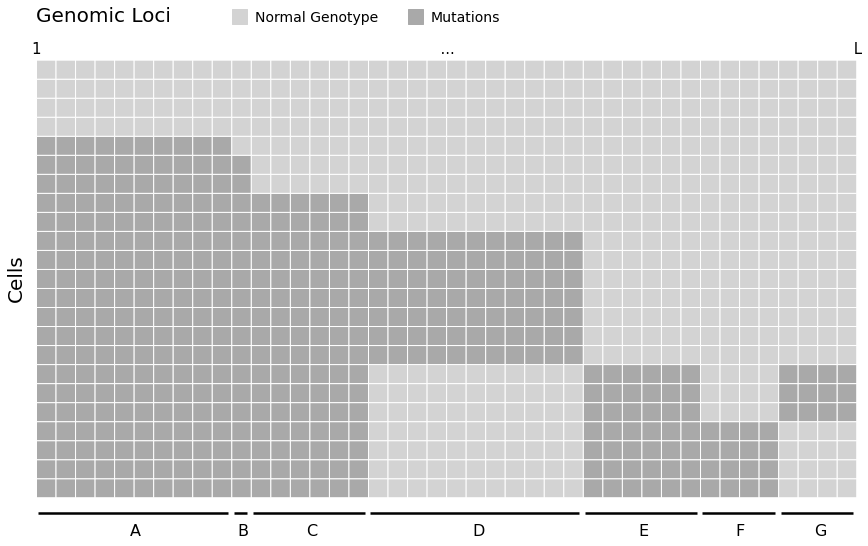

In [167]:
# Transpose to swap rows and columns
transposed_data = np.transpose(original_data.copy())

# Sort by new rows in reverse order, i.e. the columns of the original data
col_sorted_data = transposed_data[np.argsort([-1 * np.count_nonzero(col) for col in transposed_data],
                                             kind = "stable")]

# Remove loci with no mutations present
empty_cols = np.where(~col_sorted_data.any(axis = 1))[0]
col_sorted_data = np.delete(col_sorted_data, empty_cols, axis = 0)

# Find the unique clonal exansions (sets of mutations) across cells
expansion_idxs = np.sort(np.unique(col_sorted_data, axis = 0, return_index = True)[1])
clonal_expansions = col_sorted_data[expansion_idxs]

# View the matrix
plotMatrix(np.transpose(col_sorted_data),
           expansion_coords = expansion_idxs)

for i in range(1, len(clonal_expansions)):
    # Get the mutated loci for each clonal expansion
    loci_idx = np.where(np.all(col_sorted_data == clonal_expansions[i], axis = 1))
    # Multiply the binary mutations to set a unique index for each clonal expansion
    col_sorted_data[loci_idx] *= (i + 1)
    
# Transpose again to switch rows back to columns
col_sorted_data = np.transpose(col_sorted_data)

### Calculating Metrics
#### Clone Fractions and Tumour Purity
The clone fractions ($\pi$) indicate the prevalence of clones or subpopulations of cells within a sample. To calculate $\pi_{i}$ for a clone $i$, the number of cells belonging to that clone $n_{i}$ is divided by the total number of cells across the whole sample $N$.

$\pi_{i} = \frac{n_{i}}{N}$

Deriving the clone fractions enables the purity of the tumour $\rho$ to be derived. Here it is assumed that normal, non-cancerous cells are those without any SNVs. The fraction of these normal cells is $\pi_{0}$, and so the tumour purity is $\rho = 1 - \pi_{0}$.

#### Cancer Cell Fraction (CCF)
The CCFs ($\tau$) are the proportion of cancer cells carrying a certain set of SNVs. This is calculated as the sum of the frequencies of clones in which a mutation $j$ appears, scaled by the proportion of cancer cells.

$\tau_{j} = \frac{1}{1 - \pi_{0}} \sum^{K}_{k=1} \pi_{k} G_{kj}$

In [168]:
# Find the genotype of each clonal and subclonal population
clone_idxs = np.sort(np.unique(col_sorted_data, axis = 0, return_index = True)[1])
clones = col_sorted_data[clone_idxs]

# Proportion of each clone in the total population (π)
clone_fractions = []
# Index of the normal cell clone fraction
normal_idx = 0

for i in range(len(clones)):
    # Record % of each clone in the total population
    clone_fractions.append(len(np.where(np.all(col_sorted_data == clones[i],
                                               axis = 1))[0]) / n_rows)
    # Check for normal cells without mutations
    if (np.sum(clones[i]) == 0):
        # Record the index of the clone fraction for normal cells in the population
        normal_idx = i

# Proportion of mutations introduced by each clonal expansion
cellular_fractions = []
# Proportion of cancerous cells in a tumor (τ)
cancer_cell_fractions = []
        
for exp in clonal_expansions:
    # Calculate cellular fraction and CCF
    cellular_fractions.append(np.count_nonzero(exp) / exp.size)
    cancer_cell_fractions.append(cellular_fractions[len(cellular_fractions)-1] /
                                 (1 - clone_fractions[normal_idx]))

### Viewing Clonal and Subclonal Structure

Highlighting the groups of mutations in the clonal evolution matrix reveals a clear hierarchical structure. This starts with several SNVs being introduced in $A$, as these mutations are in 82.6% of sampled cells and all cancer cells (CCF 1). Two more sets of SNVs are introduced at subclones $AB$ and $ABC$, before branching occurs.

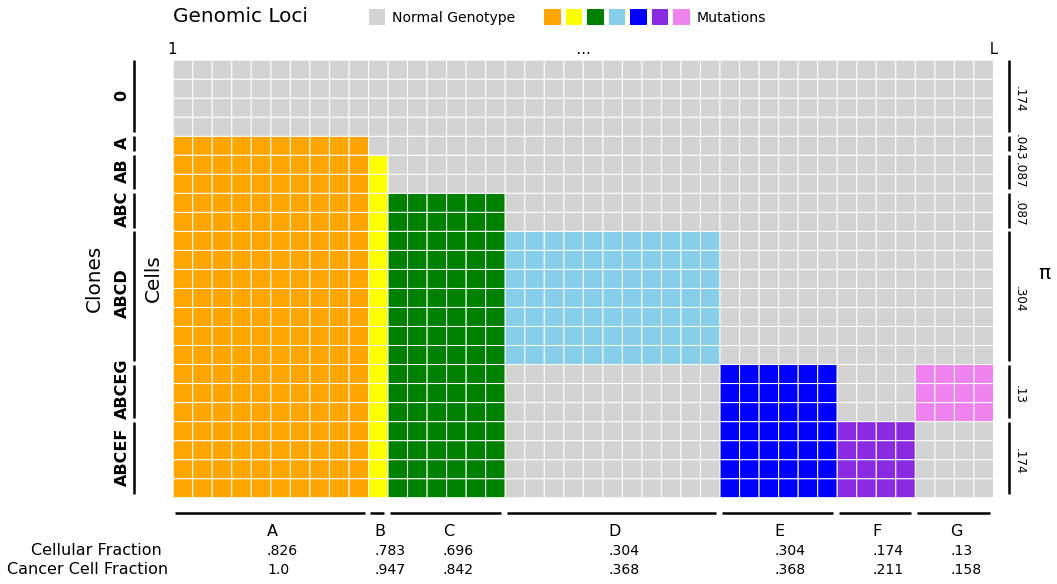

In [169]:
mutation_colours = ['lightgrey', 'orange', 'yellow', 'green', 'skyblue', 'blue',
                    'blueviolet', 'violet']

# Get the indexes of cells which are the first occurance of each clone
clone_idxs = [np.where(np.all(clones[i] == col_sorted_data,
                              axis = 1))[0][0] for i in range(len(clones))]
# Find the clonal expansions that are characteristic of each clone
clone_patterns = [np.unique(c) for c in clones]

# View the matrix
plotMatrix(col_sorted_data,
           mut_colours = mutation_colours,
           expansion_coords = expansion_idxs,
           clone_coords = clone_idxs,
           clone_features = clone_patterns,
           clone_fracs = clone_fractions,
           cell_fracs = cellular_fractions,
           ccfs = cancer_cell_fractions)

# Column Summary
The column summary plot depicts the number of mutated loci per mutation type. For example, the SNV in +$B$ only encompasses one mutated locus. However, this mutation has a high CCF as it developed early in an early clonal expansion and is therefore inherited by many daughter clones. The bars sum to the number of mutated loci observed in the mixture, in this case 42. 


In [35]:
# Count the number of mutations introduced per clonal expansion
num_mutations = []

for i in range(len(clones)):
    # Find a cell with the mutations from the expansion
    cell_coords = np.where(clones == (i + 1))
    cell_loci = clones[cell_coords[0][0]]
    # Count loci
    num_mutations.append(np.count_nonzero(cell_loci == (i + 1)))

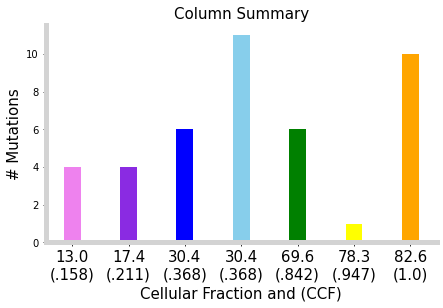

In [36]:
def columnSummaryPlot(n_mutations, cell_fracs, ccfs):
    # Create figure
    fig, ax = plt.subplots(figsize = (7, 4))

    # Set axes border
    ax.spines["left"].set_linewidth(5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_linewidth(5)

    # Set axis colour to grey
    for spine in ax.spines.values():
        spine.set_edgecolor('lightgrey')
    
    # Create labels for each bar containing the cellular fraction and CCF
    x_labels = []
    
    for i in range(len(cell_fracs)):
        x_labels.append(str(round(cell_fracs[i], 3) * 100) +
                        "\n(" + str(round(ccfs[i], 3)).lstrip("0") + ")")

    x_labels = x_labels[::-1]
    ticks = np.arange(len(x_labels))

    # Plot bars
    plt.bar(ticks, np.flip(n_mutations), color = mutation_colours[::-1], width = 0.3)

    # Set axis names and annotation
    plt.xticks(ticks = ticks, labels = x_labels, fontsize = 15)

    plt.xlabel("Cellular Fraction and (CCF)", fontsize = 15)
    plt.ylabel("# Mutations", fontsize = 15)

    # Add plot title
    plt.title("Column Summary", fontsize = 15)

    plt.show()
    
columnSummaryPlot(n_mutations = num_mutations,
                  cell_fracs = cellular_fractions,
                  ccfs = cancer_cell_fractions)

# Row Summary
The purpose of a row summary plot is to show how many cells carry each genotype. Therefore, the number of cells must first be counted.

In [119]:
def nameClones(clone_features):
    # Underdermined names per clone
    clone_names = []
        
    # Check if info provided about which clones belong to which clonal expansions
    if (clone_features):
        # Create name for each clone based on sets of mutations from clonal expansions
        for i in range(len(clone_features)):
            clone = clone_features[i]
            # Remove non-mutated loci
            clone = clone[clone != 0]
                
            if (len(clone) > 0):
                # Set name by concatenating expansion names
                clone_names.append(''.join([chr(64 + l) for l in clone]))
            else:
                clone_names.append("0")
                
    return(clone_names)

# Set identifiers for the clones based on their mutations, e.g. A, AB, ABC, ABD
named_clones = nameClones(clone_features = clone_patterns)

# Count the number of cells per clone
num_cells = {}

for i in range(len(clones)):
    num_cells[named_clones[i]] = np.sum((col_sorted_data == clones[i]).all(1))

Some ancestoral clones that introduced sets of mutations may have gone extinct / not detected in the sampled tumour cells. For example, it is likely a clone $ABCE$ is the ancestor to $ABCEF$ and $ABCEG$, even though no cells were detected with this genotype. However, this can be estimated through deriving the tree structure of clonal evolution.

In [149]:
def estimateClonalStructure(clone_features, clone_names):
    # Estimate the tree structure of the clonal expansions
    clone_order = {}
    current_clone = "0"
    concat_clone_names = '\t'.join(clone_names)
    
    for j in range(np.max(np.concatenate(clone_features))):
        # Get the name of the next clonal expansion
        expansion = chr(65 + j)
        new_clone = expansion
        
        # Check not first clonal population
        if current_clone != "0":
            # Set the name of the expected next clone
            new_clone = current_clone + expansion
            
            # Check if clone exists in sequenced population
            if new_clone in concat_clone_names:
                # Test if clone encountered in loop
                if new_clone in clone_order.keys():
                    # Add the clone to a list of ancestor clones
                    clone_order[current_clone] = [clone_order[current_clone], new_clone]
                else:
                    # Add the clone as the sole ancestor clone
                    clone_order[current_clone] = new_clone
                    
            else:
                # Revert back one expansion as theoretical clone does not exist
                new_clone = new_clone[:-2] + new_clone[-1]
                current_clone = current_clone[:-1]
                if current_clone in clone_order.keys():
                    # Add the clone to a list of ancestor clones
                    clone_order[current_clone] = [clone_order[current_clone], new_clone]
                else:
                    # Add the clone as the sole ancestor clone
                    clone_order[current_clone] = new_clone
                    
        else:
            # Add child for first clone
            clone_order[current_clone] = new_clone
            
        # Set new clone to find children for in next iteration
        current_clone = new_clone
    
    return(clone_order)
    
# Estimate the clonal structure
clone_structure = estimateClonalStructure(clone_patterns, named_clones)
print("Estimated structure: " + str(clone_structure))

# Find names of any ancestor clones no longer in the population
extinct_clones = list(set(list(clone_structure.keys()) + named_clones) - set(named_clones))
print("Extinct clones: " + str(extinct_clones))

for c in extinct_clones:
    num_cells[c] = 0
    
print("Cell counts: " + str(num_cells))

Estimated structure: {'0': 'A', 'A': 'AB', 'AB': 'ABC', 'ABC': ['ABCD', 'ABCE'], 'ABCE': ['ABCEF', 'ABCEG']}
Extinct clones: ['ABCE']
Cell counts: {'0': 4, 'A': 1, 'AB': 2, 'ABC': 2, 'ABCD': 7, 'ABCEG': 3, 'ABCEF': 4, 'ABCE': 0}


The row summary plot shows how many cells carry each genotype. This shows how $ABCE$ is extinct, while $ABCD$ is the dominant clone as it comprises the largest proportion of cells. All clones sum to 23 as there are 23 cells in total.

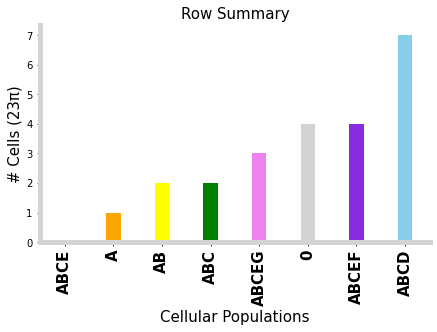

In [147]:
def rowSummaryPlot(clone_features, cell_counts):
    # Create figure
    fig, ax = plt.subplots(figsize = (7, 4))

    # Set axes border
    ax.spines["left"].set_linewidth(5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_linewidth(5)

    for spine in ax.spines.values():
        spine.set_edgecolor('lightgrey')
    
    # Set data to plot, ordering low to high by number of cells
    labels = [x for _, x in sorted(zip(cell_counts.values(), cell_counts.keys()))]
    height = sorted(cell_counts.values())
    ticks = np.arange(len(labels))

    row_colours = ['blue', 'orange', 'yellow', 'green', 'violet',
                   'lightgrey', 'blueviolet', 'skyblue']

    # Create bars
    plt.bar(ticks, height, color = row_colours, width = 0.3)

    # Set axis names and annotation
    plt.xticks(ticks = ticks, labels = labels,
               rotation = 90, fontweight = 'bold', fontsize = 15)

    plt.xlabel("Cellular Populations", fontsize = 15)
    plt.ylabel("# Cells (" + str(sum(height)) + "π)", fontsize = 15)

    # Add plot title
    plt.title("Row Summary", fontsize = 15)

    plt.show()
    
rowSummaryPlot(clone_features = clone_patterns, cell_counts = num_cells)

# Clonal Evolution Tree
A clonal evolution tree presents the evolutionary relations between clones found in a mixture. This demonstrates which clones descend from one another. Each clonal population has a distinct genotype and is plotted as a circle with a genotype symbol to the right or underneath. The proportion of the overall cellular mixture with that genotype is shown by the number in the centre. The tree begins with normal cells has genotype $0$ indicating no mutations. As there are 23 cells in total, these cells represent 4/23, i.e., $\pi_{0}$ is 17.4% of the mixture.

Arrows between clones imply a clonal expansion in which a somatic mutation has occurred creating new clones with an altered genotype. The symbol for the new mutation is displayed on the left, while the mutations accumulated over time are shown on the side in bold. For example, $ABC$ is the result of three clonal expansions +$A$, +$B$ and +$C$. This population branches into clone $ABCD$ and an extinct clone $ABCE$. This extinct population was superseded by its daughter clones $ABCEF$ and $ABCEG$.


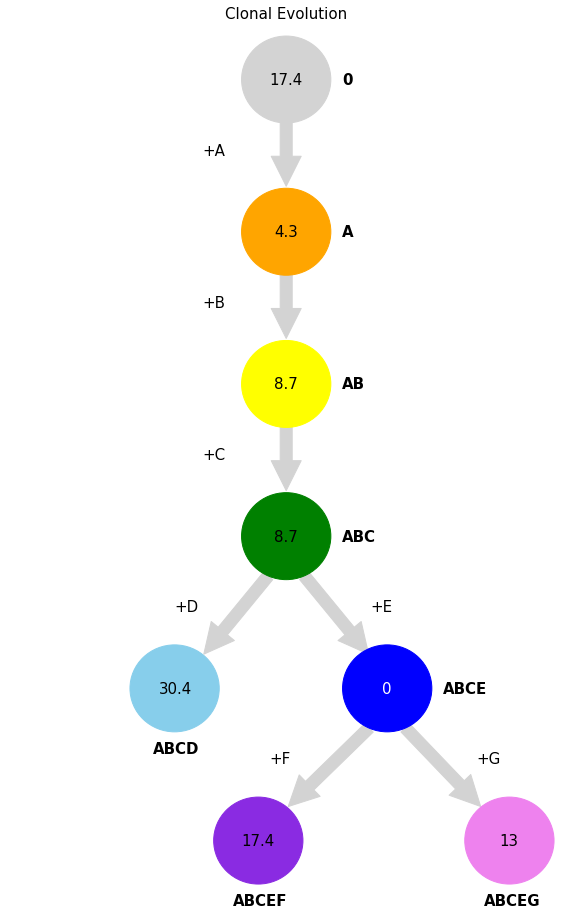

In [170]:
fig, ax = plt.subplots(figsize = (10, 10))

# Add plot title
plt.title("Clonal Evolution", fontsize = 15)

# Hide plot edge and axes
plt.box(False)
plt.axis('off')

# Add circles, arrows and annotations
plt.text(0.6, 0.89, "0", fontsize = 15, fontweight = "bold")
plt.text(0.47, 0.89, "17.4", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.85), (0.5, 0.7),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.9), 0.08, color = mutation_colours[0],
                        clip_on = False))

# A
plt.text(0.35, 0.76, "+A", fontsize = 15)
plt.text(0.6, 0.61, "A", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.61, "4.3", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.55), (0.5, 0.42),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.62), 0.08, color = mutation_colours[1],
                        clip_on = False))

# AB
plt.text(0.35, 0.48, "+B", fontsize = 15)
plt.text(0.6, 0.33, "AB", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.33, "8.7", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.5, 0.27), (0.5, 0.14),
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.34), 0.08, color = mutation_colours[2],
                        clip_on = False))

# ABC
plt.text(0.35, 0.2, "+C", fontsize = 15)
plt.text(0.6, 0.05, "ABC", fontsize = 15, fontweight = "bold")
plt.text(0.478, 0.05, "8.7", fontsize = 15)
ax.add_patch(patches.FancyArrowPatch((0.47, -0.01), (0.35, -0.16), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(patches.FancyArrowPatch((0.53, -0.01), (0.65, -0.16), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.5, 0.06), 0.08, color = mutation_colours[3],
                        clip_on = False))

# ABCD
plt.text(0.3, -0.08, "+D", fontsize = 15)
plt.text(0.262, -0.34, "ABCD", fontsize = 15, fontweight = "bold")
plt.text(0.271, -0.23, "30.4", fontsize = 15)
ax.add_patch(plt.Circle((0.3, -0.22), 0.08, color = mutation_colours[4],
                        clip_on = False))

# ABCE
plt.text(0.65, -0.08, "+E", fontsize = 15)
plt.text(0.78, -0.23, "ABCE", fontsize = 15, fontweight = "bold")
plt.text(0.671, -0.23, "0", fontsize = 15, color = "white")
ax.add_patch(patches.FancyArrowPatch((0.651, -0.29), (0.501, -0.44), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(patches.FancyArrowPatch((0.711, -0.29), (0.851, -0.44), clip_on = False,
                                 mutation_scale = 60, color = "lightgrey"))
ax.add_patch(plt.Circle((0.681, -0.22), 0.08, color = mutation_colours[5],
                        clip_on = False))

# ABCEF
plt.text(0.47, -0.36, "+F", fontsize = 15)
plt.text(0.405, -0.62, "ABCEF", fontsize = 15, fontweight = "bold")
plt.text(0.42, -0.51, "17.4", fontsize = 15)
ax.add_patch(plt.Circle((0.45, -0.5), 0.08, color = mutation_colours[6],
                        clip_on = False))

# ABCEG
plt.text(0.84, -0.36, "+G", fontsize = 15)
plt.text(0.855, -0.62, "ABCEG", fontsize = 15, fontweight = "bold")
plt.text(0.882, -0.51, "13", fontsize = 15)
ax.add_patch(plt.Circle((0.9, -0.5), 0.08, color = mutation_colours[7],
                        clip_on = False))

plt.show()